# Feature extraction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy

In [2]:
dataset = pd.read_csv(r'D:\origindata.csv',encoding="ISO-8859-1")
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Male                         893 non-null    int64
 1   Female                       893 non-null    int64
 2   Age,18-25                    893 non-null    int64
 3   Age,26-35                    893 non-null    int64
 4   Age,>35                      893 non-null    int64
 5   Primary school and below     893 non-null    int64
 6   Junior high school           893 non-null    int64
 7   High school and above        893 non-null    int64
 8   Unmarried                    893 non-null    int64
 9   Married                      893 non-null    int64
 10  Divorce                      893 non-null    int64
 11  Unemployed                   893 non-null    int64
 12  In employment                893 non-null    int64
 13  Urban                        893 non-null    int64

,Male,Female,"Age,18-25","Age,26-35","Age,>35",Primary school and below,Junior high school,High school and above,Unmarried,Married,...,"Friend drug abuse,yes",Unsatisfactory,General satisfaction,Satisfactory,Physical abuse,Physical neglect,Emotional abuse,Emotional neglect,Sexual abuse,Relapse
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,0.522956,0.477044,0.595745,0.337066,0.067189,0.346025,0.409854,0.244121,0.584546,0.318029,...,0.723404,0.020157,0.107503,0.872340,5.974244,10.900336,6.113102,12.974244,5.740202,0.845465
std,0.499753,0.499753,0.491022,0.472973,0.250490,0.475968,0.492082,0.429806,0.493076,0.465972,...,0.447565,0.140615,0.309925,0.333897,2.281336,2.764308,1.855055,6.160449,1.671351,0.361664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,5.000000,5.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,5.000000,9.000000,5.000000,8.000000,5.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,5.000000,10.000000,5.000000,11.000000,5.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,6.000000,13.000000,7.000000,18.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,19.000000,19.000000,15.000000,23.000000,14.000000,1.000000


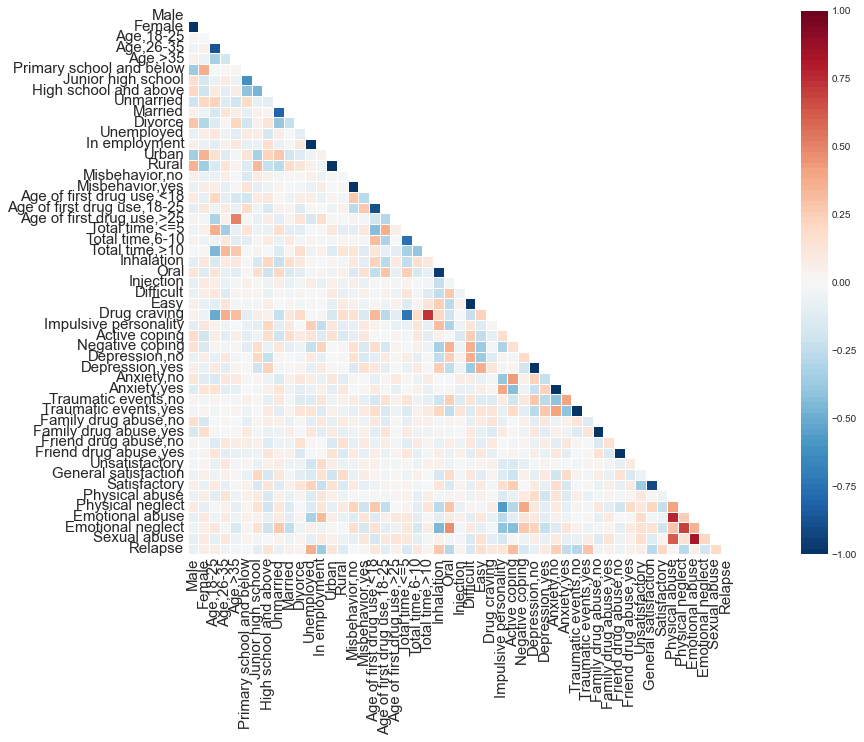

In [3]:
# Create a correlation plot of both datasets.
import seaborn as sns
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);


font1 = {
# 'weight' : 'normal',
'size' : 15,
}
#legend = plt.legend(handles=[A,B],prop=font1)
plt.tick_params(labelsize=15)


plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)
#plt.legend(X)
plt.savefig('0.png',dpi=600,bbox_inches="tight")
plt.show()

In [4]:
feat_labels = dataset.columns[:51]

In [5]:
print(feat_labels)

Index(['Male', 'Female', 'Age,18-25', 'Age,26-35', 'Age,>35',
       'Primary school and below', 'Junior high school',
       'High school and above', 'Unmarried', 'Married', 'Divorce',
       'Unemployed', 'In employment', 'Urban', 'Rural', 'Misbehavior,no',
       'Misbehavior,yes', 'Age of first drug use,<18',
       'Age of first drug use,18-25', 'Age of first drug use,>25',
       'Total time,<=5', 'Total time,6-10', 'Total time,>10', 'Inhalation',
       'Oral', 'Injection', 'Difficult', 'Easy', 'Drug craving',
       'Impulsive personality', 'Active coping', 'Negative coping',
       'Depression,no', 'Depression,yes', 'Anxiety,no', 'Anxiety,yes',
       'Traumatic events,no', 'Traumatic events,yes', 'Family drug abuse,no',
       'Family drug abuse,yes', 'Friend drug abuse,no',
       'Friend drug abuse,yes', 'Unsatisfactory', 'General satisfaction',
       'Satisfactory', 'Physical abuse', 'Physical neglect', 'Emotional abuse',
       'Emotional neglect', 'Sexual abuse', 'Relap

In [6]:
Y = dataset['Relapse']
X = dataset.drop(['Relapse'], axis = 1)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn import svm
import numpy as np
import pylab as pl 
from sklearn import svm
selector = RFECV(
    estimator=svm.SVC(kernel='linear'),  
    min_features_to_select=2, 
    cv=10,  
    scoring="accuracy",  
    n_jobs=-1  
)
results = selector.fit(X, Y)
# results.n_features_
# results.support_
# results.ranking_
print("Number of selected features = %d" % results.n_features_)
print("Selected features: %s" % results.support_)
print("Feature ranking: %s" % results.ranking_)


Number of selected features = 30
Selected features: [ True False  True False  True  True  True  True  True False  True  True
  True  True  True False False  True  True False  True False False  True
 False False  True  True False False  True False  True  True  True False
  True  True False False False False  True  True  True  True False  True
 False  True]
Feature ranking: [ 1  5  1  9  1  1  1  1  1 11  1  1  1  1  1 12  8  1  1  6  1  7 19  1
  4 21  1  1 10 14  1 20  1  1  1  3  1  1 15 17 16 18  1  1  1  1 13  1
  2  1]


In [8]:
X_new = results.transform(X)
X_new

array([[ 1,  0,  0, ...,  7,  7,  6],
       [ 1,  0,  0, ...,  5,  5,  5],
       [ 1,  0,  0, ...,  5,  5,  5],
       ...,
       [ 0,  1,  0, ...,  9, 10, 10],
       [ 0,  0,  0, ...,  9, 10, 10],
       [ 0,  1,  0, ...,  9, 10, 10]], dtype=int64)

In [9]:
X_new = X.loc[:, results.support_]
X_new.head()

,Male,"Age,18-25","Age,>35",Primary school and below,Junior high school,High school and above,Unmarried,Divorce,Unemployed,In employment,...,"Depression,yes","Anxiety,no","Traumatic events,no","Traumatic events,yes",Unsatisfactory,General satisfaction,Satisfactory,Physical abuse,Emotional abuse,Sexual abuse
0,1,0,0,1,0,0,0,1,1,0,...,0,1,1,0,0,0,1,7,7,6
1,1,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,1,5,5,5
2,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,5,5,5
3,1,0,1,1,0,0,0,0,0,1,...,0,1,1,0,0,0,1,6,7,5
4,1,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,1,5,7,5


# Data processing after feature extraction

In [400]:
dataset = pd.read_csv(r'D:\origindata-SVM.csv',encoding="ISO-8859-1")
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Male                         893 non-null    int64
 1   Age,18-25                    893 non-null    int64
 2   Age,>35                      893 non-null    int64
 3   Primary school and below     893 non-null    int64
 4   Junior high school           893 non-null    int64
 5   High school and above        893 non-null    int64
 6   Unmarried                    893 non-null    int64
 7   Divorce                      893 non-null    int64
 8   Unemployed                   893 non-null    int64
 9   In employment                893 non-null    int64
 10  Urban                        893 non-null    int64
 11  Rural                        893 non-null    int64
 12  Age of first drug use,<18    893 non-null    int64
 13  Age of first drug use,18-25  893 non-null    int64

,Male,"Age,18-25","Age,>35",Primary school and below,Junior high school,High school and above,Unmarried,Divorce,Unemployed,In employment,...,"Anxiety,no","Traumatic events,no","Traumatic events,yes",Unsatisfactory,General satisfaction,Satisfactory,Physical abuse,Emotional abuse,Sexual abuse,Relapse
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,0.522956,0.595745,0.067189,0.346025,0.409854,0.244121,0.584546,0.097424,0.614782,0.385218,...,0.566629,0.695409,0.304591,0.020157,0.107503,0.872340,5.974244,6.113102,5.740202,0.845465
std,0.499753,0.491022,0.250490,0.475968,0.492082,0.429806,0.493076,0.296701,0.486920,0.486920,...,0.495818,0.460492,0.460492,0.140615,0.309925,0.333897,2.281336,1.855055,1.671351,0.361664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000,5.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000,5.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,7.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,15.000000,14.000000,1.000000


In [401]:
y = dataset['Relapse']
X = dataset.drop(['Relapse'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#  SMOTE-Data enhancements

In [402]:
from imblearn.over_sampling import SMOTE
X_resample_train, y_resample_train = SMOTE().fit_resample(X_train, y_train)
print ('The number of transactions after resampling : ' + str(len(X_resample_train)))
print ('Is the number of fraudulent transaction is equal to the number of normal tansactions? ' + str(sum(y_resample_train == 0) == sum(y_resample_train == 1)))

The number of transactions after resampling : 922
Is the number of fraudulent transaction is equal to the number of normal tansactions? True


In [403]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_resample_train)
X_resample_train = scaler.transform(X_resample_train)  
X_test = scaler.transform(X_test) 

# Machine learning models

# LR

In [404]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10,
                   class_weight=None,
                   dual=False, 
                   fit_intercept=True,
                   intercept_scaling=1, 
                   max_iter=100, 
                   multi_class='ovr',
                   n_jobs=1,
                   penalty='l2',
                   random_state=None, 
                   solver='liblinear',
                   tol=0.0001,
                   verbose=0, 
                   warm_start=False)

lr.fit(X_resample_train,y_resample_train)
y_pre_log = lr.predict(X_test)

lr_scores:
               precision    recall  f1-score   support

         不复吸       0.63      0.73      0.68        64
         又复吸       0.94      0.90      0.92       294

    accuracy                           0.87       358
   macro avg       0.78      0.82      0.80       358
weighted avg       0.88      0.87      0.88       358



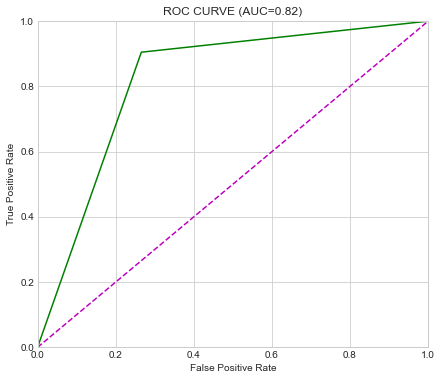

In [406]:
from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
lr_scores = classification_report(y_test, y_pre_log, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("lr_scores:\n", lr_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt


FPR,TPR,threshold=roc_curve(y_test,y_pre_log,pos_label=1)

AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()

# SVM

svc_scores:
               precision    recall  f1-score   support

         不复吸       0.46      0.80      0.59        64
         又复吸       0.95      0.80      0.87       294

    accuracy                           0.80       358
   macro avg       0.71      0.80      0.73       358
weighted avg       0.86      0.80      0.82       358



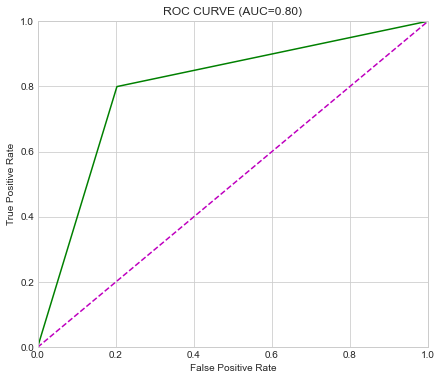

In [409]:
svc_classifier = SVC(kernel = 'linear', C = 10, Probability = 3, shrinking = True)
svc_classifier.fit(X_resample_train, y_resample_train)

y_pre_SVM = svc_classifier.predict(X_test)
from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
svc_scores = classification_report(y_test, y_pre_SVM, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("svc_scores:\n", svc_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt


FPR,TPR,threshold=roc_curve(y_test,y_pre_SVM,pos_label=1)

AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()

# DT

In [411]:
dt_classifier = DecisionTreeClassifier(max_features = 30, random_state = 10,
                                           criterion="gini",
                                         splitter="random",
                                         max_depth=None,
                                         min_samples_split=0.199,
                                         min_samples_leaf=1,
                                         min_impurity_decrease=0.03,
                                         min_weight_fraction_leaf=0.02 )
dt_classifier.fit(X_resample_train, y_resample_train)

dt_scores:
               precision    recall  f1-score   support

         不复吸       0.39      1.00      0.56        64
         又复吸       1.00      0.66      0.80       294

    accuracy                           0.72       358
   macro avg       0.70      0.83      0.68       358
weighted avg       0.89      0.72      0.76       358



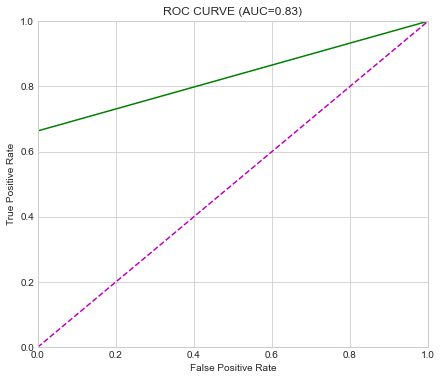

In [413]:
y_pre_dec = dt_classifier.predict(X_test)
from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dt_scores = classification_report(y_test, y_pre_dec, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("dt_scores:\n", dt_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
FPR,TPR,threshold=roc_curve(y_test,y_pre_dec,pos_label=1)

AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()

# RF

In [426]:
clf = RandomForestClassifier(max_depth = 5, n_estimators = 100, 
                             criterion = 'gini', random_state = 0)

rf_scores:
               precision    recall  f1-score   support

         不复吸       0.95      0.81      0.87        64
         又复吸       0.96      0.99      0.97       294

    accuracy                           0.96       358
   macro avg       0.95      0.90      0.92       358
weighted avg       0.96      0.96      0.96       358



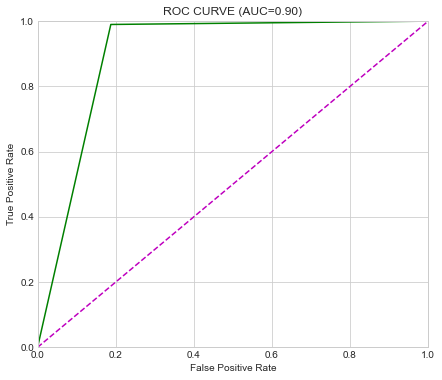

In [415]:
y_pre_randomtree = rf_classifier.predict(X_test)
from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
rf_scores = classification_report(y_test, y_pre_randomtree, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("rf_scores:\n", rf_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 7, 6
FPR,TPR,threshold=roc_curve(y_test,y_pre_randomtree,pos_label=1)

AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()

# ANN

In [416]:
from keras.models import Sequential
from keras.layers import Dense

In [417]:
model = Sequential()
model.add(Dense(20,activation='relu',input_dim=30))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [418]:
model.fit(X_resample_train, y_resample_train,epochs=300)

Epoch 1/300
17/17 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8617
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8617
Epoch 3/300
17/17 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8617
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8617
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.8617
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8617
Epoch 7/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2751 - accuracy: 0.8729
Epoch 8/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.8729
Epoch 9/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.8748
Epoch 10/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.8748
Epoch 11/

17/17 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9813
Epoch 84/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0560 - accuracy: 0.9832
Epoch 85/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9832
Epoch 86/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9832
Epoch 87/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9832
Epoch 88/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9832
Epoch 89/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9832
Epoch 90/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9850
Epoch 91/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9832
Epoch 92/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9850
Epoch 93/300


17/17 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9907
Epoch 246/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9888
Epoch 247/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9888
Epoch 248/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9888
Epoch 249/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9869
Epoch 250/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9907
Epoch 251/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9907
Epoch 252/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9907
Epoch 253/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9888
Epoch 254/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9907
Epoc

In [419]:
y_pre_K = model.predict(X_test)
y_pre_K=y_pre_K.astype(np.int64)

12/12 [==============================] - 0s 1ms/step


knn_scores:
               precision    recall  f1-score   support

         不复吸       0.30      1.00      0.46        64
         又复吸       1.00      0.48      0.65       294

    accuracy                           0.58       358
   macro avg       0.65      0.74      0.55       358
weighted avg       0.87      0.58      0.62       358



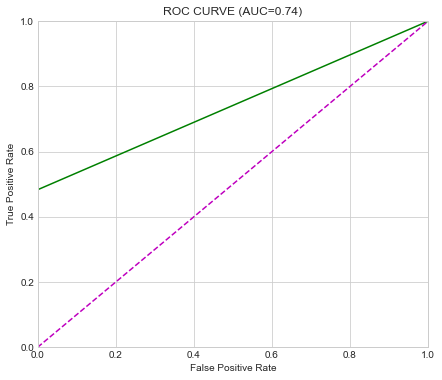

In [420]:
from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
Ann_scores = classification_report(y_test, y_pre_K, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("knn_scores:\n", Ann_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt


FPR,TPR,threshold=roc_curve(y_test,y_pre_K,pos_label=1)

AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()

# NB

The accuracy score achieved using Naive Bayes is: 65.08 %
nb_scores:
               precision    recall  f1-score   support

         不复吸       0.32      0.86      0.47        64
         又复吸       0.95      0.61      0.74       294

    accuracy                           0.65       358
   macro avg       0.64      0.73      0.60       358
weighted avg       0.84      0.65      0.69       358



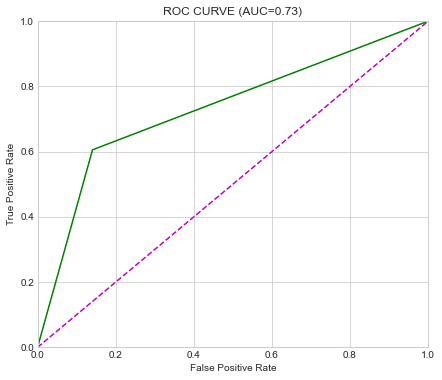

In [421]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_resample_train,y_resample_train)
y_pre_b = nb.predict(X_test)

score_nb = round(accuracy_score(y_pre_b,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
nb_scores = classification_report(y_test, y_pre_b, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("nb_scores:\n", nb_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt


FPR,TPR,threshold=roc_curve(y_test,y_pre_b,pos_label=1)

rcParams['figure.figsize'] = 7, 6
AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()


# Comparison of ROC curves of different models

In [422]:
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model

In [423]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

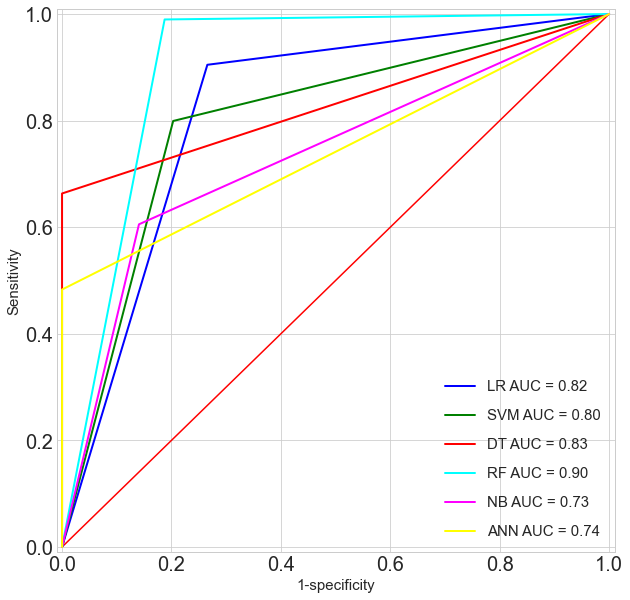

In [425]:
fig = plt.figure(figsize=(10,10)) 

models = [ 
    'LR', 
    'SVM',
     'DT', 
    'RF', 
    'NB',
    'ANN']

probs = [
    y_pre_log,
    y_pre_SVM,
    y_pre_dec,
    y_pre_randomtree,
    y_pre_b,
     y_pre_K]


colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
    
#plt.title('Receiver Operating Characteristic',fontsize=15)
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
# plt.ylabel('True Positive Rate',fontsize=15)
# plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('Sensitivity',fontsize=15)
plt.xlabel('1-specificity',fontsize=15)
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i],linewidth=2)
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])

font = {'weight': 'normal',
         'size': 15,
         };    
    
plt.legend(prop=font,labelspacing=1);
plt.tick_params(labelsize=20)
plt.savefig('ROC.png',dpi=600,bbox_inches="tight")
plt.show()